# Simulation of the Dynamics
Based off of HW 3 from MAE 269 Bioinspired Robotics with Prof. Gravish

In [18]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib as mpl
mpl.use('Qt5Agg')

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.ion()

In [19]:
def deg2rad(deg):
    return deg*np.pi/180

In [20]:
# General inverted pendulum simulator
def pendulum(t, state, l, torque):
    theta, omega = state
    dydt = [omega, -(gravity/l)*(np.sin(theta))+torque]
    return dydt

## Generate Phase Space

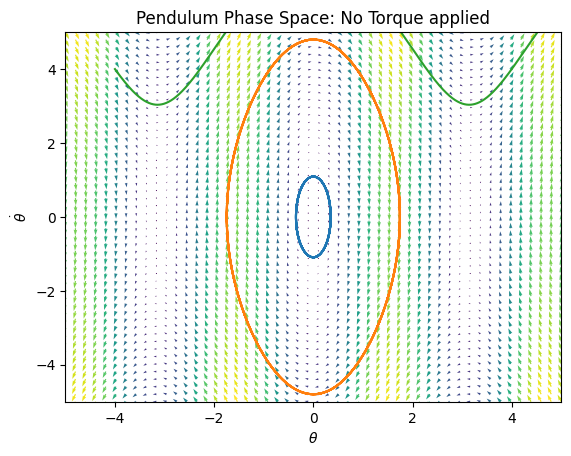

In [21]:
# PENDULUM TORQUE 1 Given sys param
L = 1
gravity = 9.8


dt = 0.001
time = np.linspace(0, 10, int(10/dt))

numpts = 50
rng = 5

[theta_vf, dtheta_vf] = np.meshgrid(np.linspace(-rng, rng, numpts), np.linspace(-rng, rng, numpts))

torque1 = 0
pen_dyn_1 = pendulum(0, [theta_vf, dtheta_vf], L, torque1)
pen_norm_1 = pen_dyn_1[0]**2 + pen_dyn_1[1]**2

plt.figure(1)
plt.clf()
plt.quiver(theta_vf, dtheta_vf, pen_dyn_1[0], pen_dyn_1[1], pen_norm_1)

#
plt.title("Pendulum Phase Space: No Torque applied")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.axis([-rng, rng, -rng, rng])

# Plot a Trajectory
# CASE 1
theta1 = deg2rad(20)
dtheta_dt1 = 0.1
pen_sol_1 = solve_ivp(lambda t, y: pendulum(t, y, L, torque1), 
                [0,10], [theta1, dtheta_dt1], 
                t_eval = time, 
                rtol=1e-8, atol = 1e-8)
plt.plot(pen_sol_1.y[0,:], pen_sol_1.y[1,:])

# CASE 2
theta2 = deg2rad(100)
dtheta_dt2 = 0.1
pen_sol_2 = solve_ivp(lambda t, y: pendulum(t, y, L, torque1), 
                [0,10], [theta2, dtheta_dt2], 
                t_eval = time, 
                rtol=1e-8, atol = 1e-8)
plt.plot(pen_sol_2.y[0,:], pen_sol_2.y[1,:])

# CASE 3
theta3 = -4 #deg2rad(180)
dtheta_dt3 = 4
pen_sol_3 = solve_ivp(lambda t, y: pendulum(t, y, L, torque1), 
                [0,10], [theta3, dtheta_dt3], 
                t_eval = time, 
                rtol=1e-8, atol = 1e-8)
plt.plot(pen_sol_3.y[0,:], pen_sol_3.y[1,:])

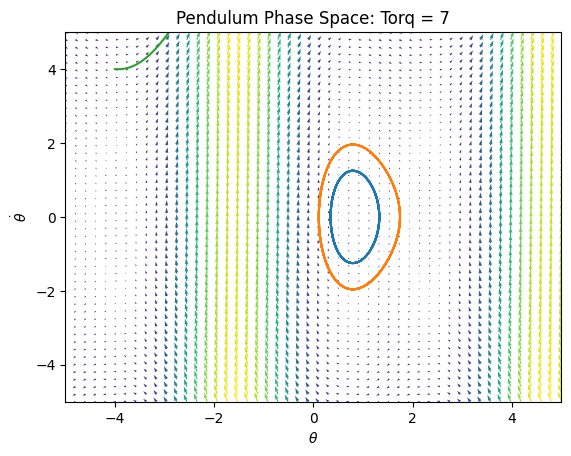

In [22]:
# PENDULUM Torque 3 Given sys param
L = 1
gravity = 9.8

#My intial cond
mytheta = deg2rad(20)
mydtheta_dt = 0.1

dt = 0.001
time = np.linspace(0, 10, int(10/dt))

numpts = 50
rng = 5

[theta_vf, dtheta_vf] = np.meshgrid(np.linspace(-rng, rng, numpts), np.linspace(-rng, rng, numpts))

torque3 = 7
pen_dyn_3 = pendulum(0, [theta_vf, dtheta_vf], L, torque3)
pen_norm_3 = pen_dyn_3[0]**2 + pen_dyn_3[1]**2

plt.figure(3)
plt.clf()
plt.quiver(theta_vf, dtheta_vf, pen_dyn_3[0], pen_dyn_3[1], pen_norm_3)

#plt.plot(pen_dyn_1.y[0,:], pen_dyn_1.y[1,:])
plt.title("Pendulum Phase Space: Torq = 7")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.axis([-rng, rng, -rng, rng])

# Plot a Trajectory
# CASE 1
theta1 = deg2rad(20)
dtheta_dt1 = 0.1
pen_sol_1 = solve_ivp(lambda t, y: pendulum(t, y, L, torque3), 
                [0,10], [theta1, dtheta_dt1], 
                t_eval = time, 
                rtol=1e-8, atol = 1e-8)
plt.plot(pen_sol_1.y[0,:], pen_sol_1.y[1,:])

# CASE 2
theta2 = deg2rad(100)
dtheta_dt2 = 0.1
pen_sol_2 = solve_ivp(lambda t, y: pendulum(t, y, L, torque3), 
                [0,10], [theta2, dtheta_dt2], 
                t_eval = time, 
                rtol=1e-8, atol = 1e-8)
plt.plot(pen_sol_2.y[0,:], pen_sol_2.y[1,:])

# CASE 3
theta3 = -4 #deg2rad(180)
dtheta_dt3 = 4
pen_sol_3 = solve_ivp(lambda t, y: pendulum(t, y, L, torque3), 
                [0,10], [theta3, dtheta_dt3], 
                t_eval = time, 
                rtol=1e-8, atol = 1e-8)
plt.plot(pen_sol_3.y[0,:], pen_sol_3.y[1,:])

## Plot the timeseries for varying intial conditions

In [23]:
def simPen(theta_0, dtheta_dt_0, T):
    dt = 0.001
    time = np.linspace(0,5,int(10/dt))
    L = 1
    gravity = 9.8
    
    pendSol = solve_ivp(lambda t, y: pendulum(t, y, L, T),
                [0,10], [theta_0, dtheta_dt_0],  # x1 = theta x2 = dtheta_dt
                t_eval = time, 
                rtol=1e-8, atol = 1e-8)
    return pendSol

# Option 1
theta1 = deg2rad(0)
dtheta_dt1 = 0.1


penSol1_1 = simPen(theta1, dtheta_dt1, torque1)
penSol3_1 = simPen(theta1, dtheta_dt1, torque3)

# Option 2
theta2 = deg2rad(15)
dtheta_dt2 = 5
penSol1_2 = simPen(theta2, dtheta_dt2, torque1)
penSol3_2 = simPen(theta2, dtheta_dt2, torque3)

# Option 3
theta3 = deg2rad(90)
dtheta_dt3 = 0.1
penSol1_3 = simPen(theta3, dtheta_dt3, torque1)
penSol3_3 = simPen(theta3, dtheta_dt3, torque3)

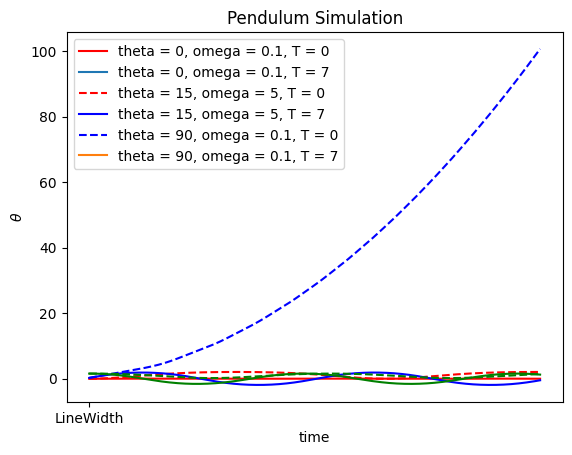

In [24]:
plt.figure(8)
plt.clf()
plt.plot(penSol1_1.t, penSol1_1.y[0,:], "r-", "LineWidth", 2)
plt.plot(penSol3_1.t, penSol3_1.y[0,:], "r--")

plt.plot(penSol1_2.t, penSol1_2.y[0,:], "b-")
plt.plot(penSol3_2.t, penSol3_2.y[0,:], "b--", "LineWidth", 10)

plt.plot(penSol1_3.t, penSol1_3.y[0,:], "g-")
plt.plot(penSol3_3.t, penSol3_3.y[0,:], "g--")

plt.ylabel('$\\theta$')
plt.xlabel('time')
plt.title("Pendulum Simulation")
plt.legend(["theta = 0, omega = 0.1, T = 0", "theta = 0, omega = 0.1, T = 7",
           "theta = 15, omega = 5, T = 0", "theta = 15, omega = 5, T = 7",
           "theta = 90, omega = 0.1, T = 0", "theta = 90, omega = 0.1, T = 7",])

## Solve for Equilibrium Pts

In [25]:
import sympy
from sympy import simplify, Function
from sympy import symbols, pprint
from sympy import sin, cos, asin, acos, pi, Abs, solve
from sympy import Matrix, diff
from sympy import lambdify

In [26]:
(t, 
 theta, 
 omega, 
 g, 
 l,
 T,
 v,
 x,
 mu,
 x1,
 x2,
 F,
 xi) = symbols("""t, 
                 theta,
                 omega
                 g, 
                 l,
                 T,
                 v,
                 x,
                 mu,
                 x1,
                 x2,
                 F,
                 xi""" , real = True)

In [27]:
#xdot = g = 0
#Build matrix, take derivative, solve for zero
g = 9.8
l = 1

T1 = 0
T2 = 3.5
T3 = 7
pen_xdot = Matrix([[omega],[-g/l*(sin(theta)) + T]])
pen_xdot

Matrix([
[             omega],
[T - 9.8*sin(theta)]])

In [29]:
# SOLVE SYSTEM AT T
pen_xdot_1 = pen_xdot.subs([(T, T1)])
pen_xdot_3 = pen_xdot.subs([(T, T3)])

pen_xdot_3

Matrix([
[             omega],
[7 - 9.8*sin(theta)]])

In [30]:
pen_xe_1 = solve(pen_xdot_1, theta, omega)
pen_xe_3 = solve(pen_xdot_3, theta, omega)

print("EqPts for T = 0   ->", pen_xe_1)
print("EqPts for T = 7   ->", pen_xe_3)

print("theta", pen_xe_3[0][0],"omega",pen_xe_1[0][1])

EqPts for T = 0   -> [(0.0, 0.0), (3.14159265358979, 0.0)]
EqPts for T = 7   -> [(0.795602953484535, 0.0), (2.34598970010526, 0.0)]
theta 0.795602953484535 omega 0.0


## Compute the Jacobian - aka Linearize the Nonlinear System

In [32]:
pen_xdot_1_J = pen_xdot_1.jacobian([theta, omega]) #Jacobian of system 1
pen_xdot_3_J = pen_xdot_3.jacobian([theta, omega])

pen_xdot1_J_xe1 = pen_xdot_1_J.subs([[theta, pen_xe_1[0][0]], [omega, pen_xe_1[0][1]]])
pen_xdot1_J_xe2 = pen_xdot_1_J.subs([[theta, pen_xe_1[1][0]], [omega, pen_xe_1[1][1]]])

pen_xdot3_J_xe1 = pen_xdot_3_J.subs([[theta, pen_xe_3[0][0]], [omega, pen_xe_3[0][1]]])
pen_xdot3_J_xe2 = pen_xdot_3_J.subs([[theta, pen_xe_3[1][0]], [omega, pen_xe_3[1][1]]])

pe1 = pen_xdot1_J_xe1.eigenvals()
print(pe1)

{-3.13049516849971*I: 1, 3.13049516849971*I: 1}


## Find Eigenvalues of Linearized System at EqPts - aka Stability Analysis

In [33]:
eig_pen1_xe1 = pen_xdot1_J_xe1.eigenvals()
eig_pen1_xe2 = pen_xdot1_J_xe2.eigenvals()

eig_pen3_xe1 = pen_xdot3_J_xe1.eigenvals()
eig_pen3_xe2 = pen_xdot3_J_xe2.eigenvals()

print("eigenvalues of Pendulum with T = 0, equil pt 1:", eig_pen1_xe1)
print("eigenvalues of Pendulum with T = 0, equil pt 2:", eig_pen1_xe2)

print("eigenvalues of Pendulum with T = 7, equil pt 1:", eig_pen3_xe1)
print("eigenvalues of Pendulum with T = 7, equil pt 2:", eig_pen3_xe2)

eigenvalues of Pendulum with T = 0, equil pt 1: {-3.13049516849971*I: 1, 3.13049516849971*I: 1}
eigenvalues of Pendulum with T = 0, equil pt 2: {-3.13049516849971: 1, 3.13049516849971: 1}
eigenvalues of Pendulum with T = 7, equil pt 1: {-2.61888741258438*I: 1, 2.61888741258438*I: 1}
eigenvalues of Pendulum with T = 7, equil pt 2: {-2.61888741258438: 1, 2.61888741258438: 1}
